# Data generator for Gaussian data peaks

\begin{equation}
\Large y_n = f(x_n) = \sum\limits_{m=1}^M [A_m \cdot e^{-\frac{(x_n-\mu_m)^2}{2\cdot\sigma_m^2}}] + \epsilon
\end{equation}

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.7



# Data generation

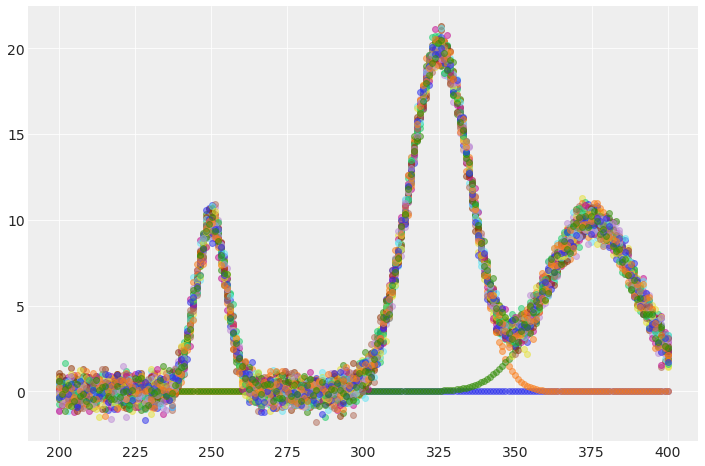

In [42]:
# Size of dataset
size = 200
obs = 30

# noise value
_epsilon = .5

# number of basis peaks
npeaks = 3

# parameter values
_mu = [250, 325, 375, 210]
_sigma = [5, 10, 15, 20]
_amp = [10, 20, 10, 10]

# labels
Yl = []

# Predictor variable
X = np.linspace(200, 400, size)

Z = np.zeros((npeaks, size))
for i in range(len(Z)):
    Z[i,:] = np.array(_amp[i] * np.exp(-(X-_mu[i])**2/(2*_sigma[i]**2)))  

# total curve is the sum of the components
Yt = np.zeros((obs, size))
for idx in range(obs):
    Yt[idx,:] = Z.sum(axis=0) + np.random.randn(size)*_epsilon
    Yl.append('1')

Y = np.vstack([Z, Yt])

plt.figure(figsize=(12, 8))
for idx in range(len(Y)):
    plt.plot(X, Y[idx,:], "o", alpha=0.5);

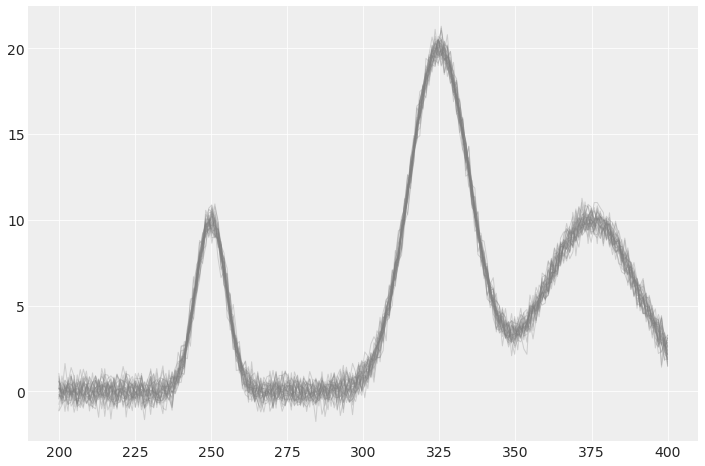

In [43]:
plt.figure(figsize=(12, 8))
for idx in range(len(Yt)):
    plt.plot(X, Yt[idx,:], "-", alpha=0.3, color='gray', linewidth=1);

# Convert to dataframe and save

In [44]:
# create dataframe
X = np.around(X, 1)
data = pd.DataFrame(data=Yt,columns=X)

# add label column
ll = pd.Series(Yl)
data = data.assign(label=pd.Series(ll))

# shuffle data
data = data.sample(frac=1, random_state=42)

data.head()

,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,...,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,label
27,-0.297971,-0.265154,0.270117,-0.171601,0.408584,0.229472,-0.906469,0.613386,-0.067419,-0.221294,...,5.449147,5.709531,3.680990,3.905081,4.025896,2.837807,2.278463,3.110596,1.712012,1
15,-0.207906,-0.292798,-0.399961,-0.018268,-0.021080,-0.693227,0.562144,-0.320119,-0.863978,0.240444,...,4.549148,4.603130,5.604090,4.589420,3.441725,2.212018,2.328061,2.750549,2.833158,1
23,-0.175172,-0.443404,-0.191641,0.493165,0.989671,-0.426523,0.227887,1.272463,0.347055,0.805218,...,5.310107,4.700429,4.759123,4.398387,4.811419,2.977231,4.344863,3.128325,1.449514,1
17,0.507933,0.182784,0.649171,0.418484,0.158008,0.687473,-0.784293,0.139454,0.469240,-0.078487,...,5.479674,5.028859,4.558796,4.557697,3.654899,2.783543,2.967306,3.177210,3.096303,1
8,0.270459,-0.537263,0.409704,-0.069804,-0.109935,0.104313,-0.683600,-0.022745,-0.518089,-0.119671,...,5.184760,5.363086,4.427270,4.136574,2.527796,3.516273,3.485584,2.291083,2.173599,1


In [45]:
data.to_csv('./dummy_data_d.csv', index=False)